In [33]:
#CODE FOR THE MINI BATCH SDG

In [1]:
#IMPORTING STUFFS
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

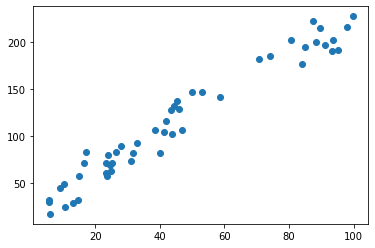

In [2]:
#CREATING RANDOM DATASET
x = np.random.uniform(1,101,50)     
xx = x.reshape(-1,1)
c = np.random.uniform(1,50,50)
y = np.array([0 for i in range(50)])
m = 2
for i in range(len(x)):
    y[i] = (m*xx[i]) + c[i]

plt.scatter(xx,y)
plt.show()


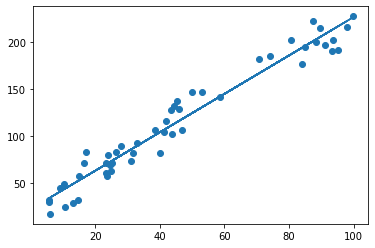

coef : [2.04814727], Intercept : 22.25871182730957


In [5]:
#Just to check my GD Algo is working fine with linear regreesion. If (working fine): same results
model = LinearRegression()
model.fit(xx,y)
pred = model.predict(xx)

plt.scatter(xx,y)
plt.plot(x,pred)
plt.show()

print(f"coef : {model.coef_}, Intercept : {model.intercept_}")


m : 2.0816761966816806, b : 23.289116907863672


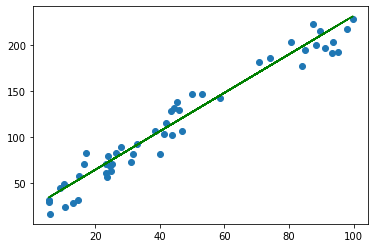

In [7]:
#CODING FOR MINI BATCH

def GDMini(x,y,batchsize):
    B = batchsize
    mcurr = 0
    bcurr = 0
    epoch = 100000
    lr = 0.0001 
    xmini = np.array([0 for i in range(B)])         #TO STORE THE X MINI BATCH
    ymini = np.array([0 for i in range(B)])         #TO STORE THE Y MINIBATCH
    for i in range(epoch):
        for j in range(B):                         #LOOP TO GET RANDOM DATA FROM THE ORIGINAL DATASET
            xtemp = np.random.choice(x)
            xmini[j] = xtemp
            indextemp = np.where(x == xtemp)
            index = indextemp[0][0]
            ymini[j] = y[index] 
        ypred = mcurr*xmini + bcurr
        derivm = -(2/B) * sum(xmini*(ymini-ypred))
        derivb = -(2/B) * sum(ymini - ypred)
        mcurr = mcurr - lr*derivm
        bcurr = bcurr - lr*derivb

    return (mcurr,bcurr)        

mcurrr,bcurrr = GDMini(x,y,10)
print(f"m : {mcurrr}, b : {bcurrr}")
#Same results

plt.scatter(x,y)
plt.plot(x,mcurrr*x + bcurrr,'g')
plt.show()

